<a href="https://colab.research.google.com/github/selfor21/NN-Models/blob/main/02_MLP_01_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEURAL NETWORK 

## MLP with 01 hidden row

### Number of Neurons = 100, 80 and 50




# 1\. Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import keras.datasets as kds
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd

In [ ]:
test_loss_l = []
test_acc_l = []
number_neurons_l = []
history_l = []

# 2\. MNIST Dataset

### Public dataset with 70000 examples (60K Train / 10K Test)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">

Ver: http://yann.lecun.com/exdb/mnist/

### Data load and preparation

In [ ]:
input_shape = (28, 28, 1)

# Keras.datasets
(x_train, y_train), (x_test, y_test) = kds.mnist.load_data()

# Features Normalization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# One-hot-encoding class convertion
num_classes = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 1s 0us/step


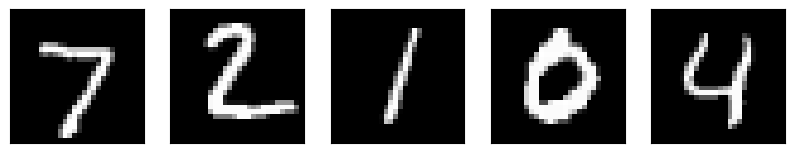

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 3\. Models

## 3.1 Hidden row with 100 neurons

In [ ]:
modelo2 = keras.Sequential()
modelo2.add(keras.layers.Flatten(input_shape=input_shape))
modelo2.add(keras.layers.Dense(units=100, activation="relu"))
modelo2.add(keras.layers.Dense(units=10, activation="softmax"))

modelo2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


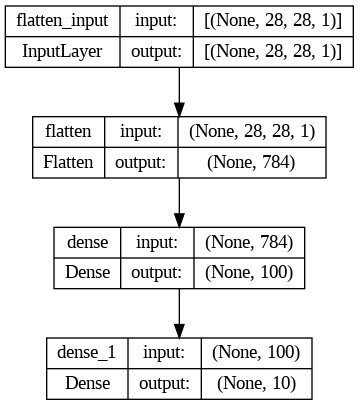

In [ ]:
#Grafo da rede gerada
tf.keras.utils.plot_model(modelo2, show_shapes=True)

In [ ]:
modelo2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2 = modelo2.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 8s - loss: 0.5211 - accuracy: 0.8603 - val_loss: 0.2602 - val_accuracy: 0.9292 - 8s/epoch - 40ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2402 - accuracy: 0.9320 - val_loss: 0.2034 - val_accuracy: 0.9442 - 613ms/epoch - 3ms/step
Epoch 3/30
188/188 - 1s - loss: 0.1858 - accuracy: 0.9471 - val_loss: 0.1680 - val_accuracy: 0.9529 - 614ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.1521 - accuracy: 0.9566 - val_loss: 0.1467 - val_accuracy: 0.9586 - 659ms/epoch - 4ms/step
Epoch 5/30
188/188 - 1s - loss: 0.1274 - accuracy: 0.9641 - val_loss: 0.1299 - val_accuracy: 0.9626 - 585ms/epoch - 3ms/step
Epoch 6/30
188/188 - 1s - loss: 0.1102 - accuracy: 0.9686 - val_loss: 0.1213 - val_accuracy: 0.9655 - 633ms/epoch - 3ms/step
Epoch 7/30
188/188 - 1s - loss: 0.0965 - accuracy: 0.9726 - val_loss: 0.1130 - val_accuracy: 0.9666 - 591ms/epoch - 3ms/step
Epoch 8/30
188/188 - 1s - loss: 0.0856 - accuracy: 0.9751 - val_loss: 0.1062 - val_accuracy: 0.9684 - 847ms/epoch - 5ms/step
Ep

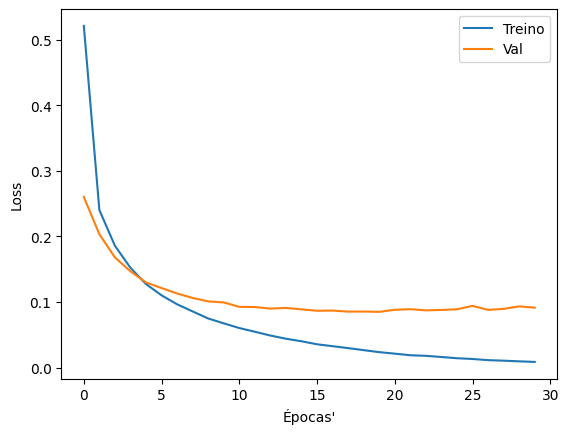

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history2.history['loss'], label="Treino")
plt.plot(history2.history['val_loss'], label="Val")
plt.legend()
plt.show()


In [ ]:
# Avaliação do modelo treinado no conjunto de tete
print("Avaliação do modelo (Teste)")
results2 = modelo2.evaluate(x_test, y_test)
print("Test loss, Test acc:", results2)


Avaliação do modelo (Teste)
313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9778
Test loss, Test acc: [0.081251360476017, 0.9778000116348267]


In [ ]:
number_neurons_l.append('100relu + 10softmax')
test_loss_l.append(results2[0])
test_acc_l.append(results2[1])

## 3.2  Hidden row with 80 neurons

In [ ]:
modelo3 = keras.Sequential()
modelo3.add(keras.layers.Flatten(input_shape=input_shape))
modelo3.add(keras.layers.Dense(units=80, activation="relu"))
modelo3.add(keras.layers.Dense(units=10, activation="softmax"))

modelo3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 80)                62800     
                                                                 
 dense_3 (Dense)             (None, 10)                810       
                                                                 
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history3 = modelo3.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 2s - loss: 0.5771 - accuracy: 0.8400 - val_loss: 0.2831 - val_accuracy: 0.9219 - 2s/epoch - 9ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2598 - accuracy: 0.9274 - val_loss: 0.2204 - val_accuracy: 0.9392 - 581ms/epoch - 3ms/step
Epoch 3/30
188/188 - 1s - loss: 0.2062 - accuracy: 0.9411 - val_loss: 0.1836 - val_accuracy: 0.9485 - 624ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.1721 - accuracy: 0.9514 - val_loss: 0.1680 - val_accuracy: 0.9521 - 568ms/epoch - 3ms/step
Epoch 5/30
188/188 - 1s - loss: 0.1472 - accuracy: 0.9577 - val_loss: 0.1493 - val_accuracy: 0.9578 - 588ms/epoch - 3ms/step
Epoch 6/30
188/188 - 1s - loss: 0.1279 - accuracy: 0.9635 - val_loss: 0.1346 - val_accuracy: 0.9599 - 594ms/epoch - 3ms/step
Epoch 7/30
188/188 - 1s - loss: 0.1131 - accuracy: 0.9679 - val_loss: 0.1282 - val_accuracy: 0.9613 - 578ms/epoch - 3ms/step
Epoch 8/30
188/188 - 1s - loss: 0.1010 - accuracy: 0.9708 - val_loss: 0.1192 - val_accuracy: 0.9642 - 670ms/epoch - 4ms/step
Epo

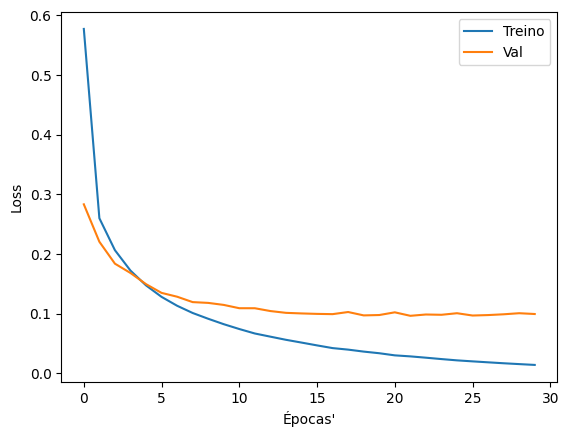

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history3.history['loss'], label="Treino")
plt.plot(history3.history['val_loss'], label="Val")
plt.legend()
plt.show()


In [ ]:
#Avaliação do modelo treinado no conjunto de teste
print("Avaliação do modelo (Teste)")
results3 = modelo3.evaluate(x_test, y_test)
print("Test loss, Test acc:", results3)


Avaliação do modelo (Teste)
313/313 [==============================] - 1s 3ms/step - loss: 0.0878 - accuracy: 0.9750
Test loss, Test acc: [0.08778582513332367, 0.9750000238418579]


In [ ]:
number_neurons_l.append('80relu + 10softmax')
test_loss_l.append(results3[0])
test_acc_l.append(results3[1])

## 3.3 Hidden row with 50 neurons

In [ ]:
modelo4 = keras.Sequential()
modelo4.add(keras.layers.Flatten(input_shape=input_shape))
modelo4.add(keras.layers.Dense(units=50, activation="relu"))
modelo4.add(keras.layers.Dense(units=10, activation="softmax"))

modelo4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history4 = modelo4.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 2s - loss: 0.6248 - accuracy: 0.8304 - val_loss: 0.3035 - val_accuracy: 0.9174 - 2s/epoch - 9ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2902 - accuracy: 0.9179 - val_loss: 0.2446 - val_accuracy: 0.9340 - 573ms/epoch - 3ms/step
Epoch 3/30
188/188 - 1s - loss: 0.2381 - accuracy: 0.9326 - val_loss: 0.2118 - val_accuracy: 0.9414 - 640ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.2006 - accuracy: 0.9439 - val_loss: 0.1914 - val_accuracy: 0.9465 - 595ms/epoch - 3ms/step
Epoch 5/30
188/188 - 1s - loss: 0.1732 - accuracy: 0.9512 - val_loss: 0.1644 - val_accuracy: 0.9538 - 590ms/epoch - 3ms/step
Epoch 6/30
188/188 - 1s - loss: 0.1510 - accuracy: 0.9571 - val_loss: 0.1538 - val_accuracy: 0.9571 - 584ms/epoch - 3ms/step
Epoch 7/30
188/188 - 1s - loss: 0.1359 - accuracy: 0.9615 - val_loss: 0.1424 - val_accuracy: 0.9600 - 722ms/epoch - 4ms/step
Epoch 8/30
188/188 - 1s - loss: 0.1224 - accuracy: 0.9650 - val_loss: 0.1351 - val_accuracy: 0.9617 - 833ms/epoch - 4ms/step
Epo

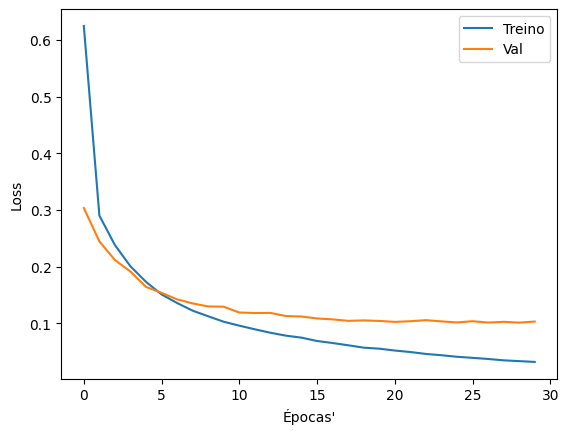

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history4.history['loss'], label="Treino")
plt.plot(history4.history['val_loss'], label="Val")
plt.legend()
plt.show()


In [ ]:
#Avaliação do modelo treinado no conjunto de teste
print("Avaliação do modelo (Teste)")
results4 = modelo4.evaluate(x_test, y_test)
print("Test loss, Test acc:", results3)


Avaliação do modelo (Teste)
313/313 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9741
Test loss, Test acc: [0.08778582513332367, 0.9750000238418579]


In [ ]:
number_neurons_l.append('50relu + 10softmax')
test_loss_l.append(results4[0])
test_acc_l.append(results4[1])

# 4\. Summary

In [ ]:
results1_df = pd
results1_df = pd.DataFrame(number_neurons_l, columns=['activation'])
results1_df['test_loss'] = test_loss_l
results1_df['test_acc'] = test_acc_l

In [ ]:
results1_df

,activation,test_loss,test_acc
0,100relu + 10softmax,0.081251,0.9778
1,80relu + 10softmax,0.087786,0.9750
2,50relu + 10softmax,0.087152,0.9741


Results are similar even with the variation of the quantity of neurons at hidden layer.